##  Data Visualization

##### Let's explore our dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
pokemon = pd.read_csv('C:/Users/Lenovo/Desktop/pokemon.csv')
fuel_econ = pd.read_csv('C:/Users/Lenovo/Desktop/fuel_econ.csv')

In [3]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# Kinds of plots
Now we shall explore some of the plots we can use to understand our data better.

- Univariate Plots
- Bivariate Plots
- MultiVariate Plots
Let's walk through each one in more details

## Univariate plots
This kind of plots is usually used for visualizing data distributions, and outliers.  
- Bar Plot
- Pie Chart
- Histogram

#### Bar Plot : Categorical variables
Let's say that we want to know the distribution of data over a certain categorical feature.  
In the following cell, we'll use seaborn countplot to do so.  
[seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)

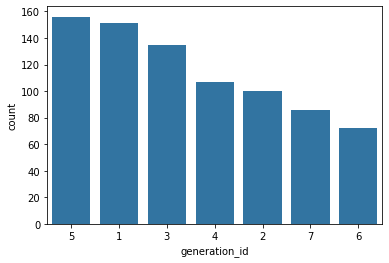

In [5]:
base_color = sb.color_palette()[0] # To give the same colors to the bars

freq = pokemon['generation_id'].value_counts() # To order the bars, often used with nominal variables

sb.countplot(data=pokemon, x='generation_id', color=base_color, order=freq.index);


#### Pie Chart
In the case of few categories you might want to use a pie chart instead. let's see how to use matplotlib.pyplot.pie function.  
[matplotlib.pyplot.pie](https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm)

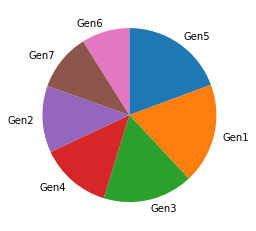

In [6]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = ["Gen" + str(x) for x in sorted_counts.index], startangle = 90, counterclock = False);

#### Histogram
Histograms can be used with continous variables to kind of get a since of the distribution of the data, it chops the data into descrete buckets (bins) and plots a bar chart of those bins.  
[matplotlib.pyplot.hist](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html)

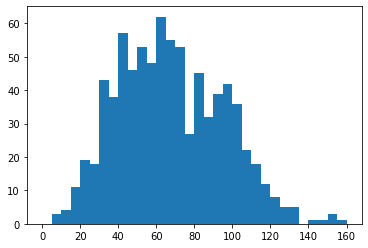

In [7]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

A cooler way of visualizing continous data distribution is using seaborn displot function.  
[seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)

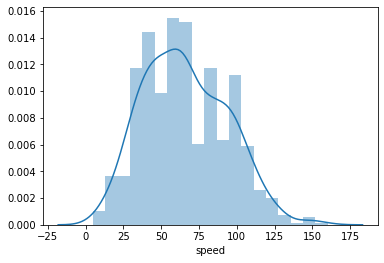

In [8]:
sb.distplot(pokemon['speed']);

## Bivarite plots : Trends and Correlation
- Scatter Plot
- Heat Map
- Violin Plot
- Box Plot
- Clustered Bar Chart

### Scatter: Continues variable vs Continues variable

**Used often to detrmine correlation between the two variables**

[matplotlib.pyplot.scatter](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html)  
[seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

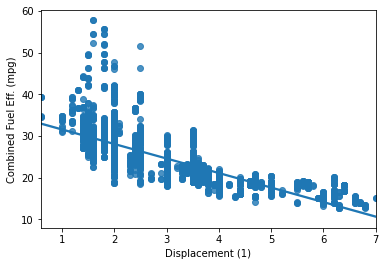

In [9]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

### Important note
##### Note that seaborn plots a best-fit line for the data but the data here is not linear so the line doesn't fit the data will
##### What should we do ?? 
- we can transform the data so we can have a linear relationship, notice that log (y) is proportional with x
- we can draw best-fit curve not a line


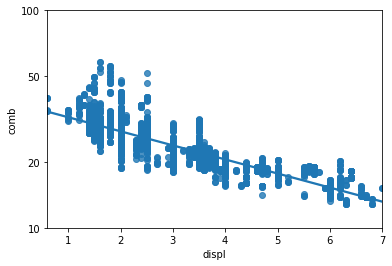

In [10]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

#### Heat Map: Quantitative  variable vs Quantitative  variable

##### 2D version of a histogram

##### Better than scatter plot when:
- Plotting discrete vs discrete variable
- data points are enormous

[matplotlib.pyplot.hist2d](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist2d.html?highlight=matplotlib%20pyplot%20hist2d#matplotlib.pyplot.hist2d)

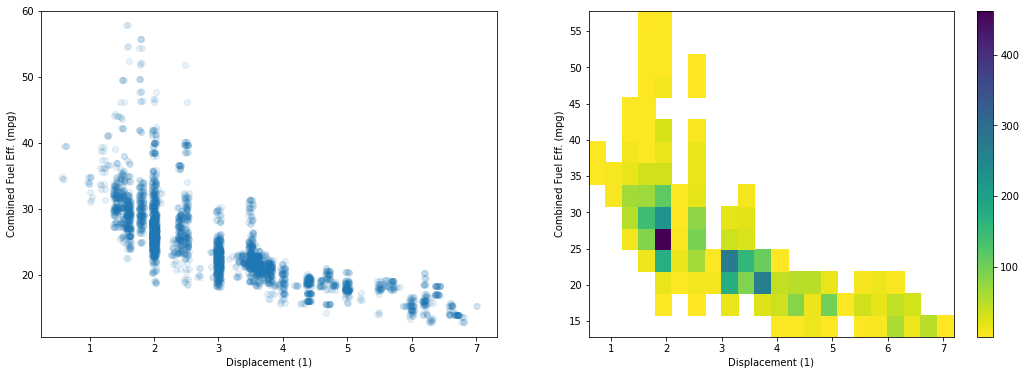

In [11]:
plt.figure(figsize = [18, 6])

# Scatter Plot
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Heat Map
# Specify bin edges 
bins_x = np.arange(np.min(fuel_econ['displ']), np.max(fuel_econ['displ'])+0.3, 0.3)
bins_y = np.arange(np.min(fuel_econ['comb']), np.max(fuel_econ['comb'])+3, 3)

plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

#### Violin Plot: Quantitative  variable vs Qualtiative  variable

[seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)

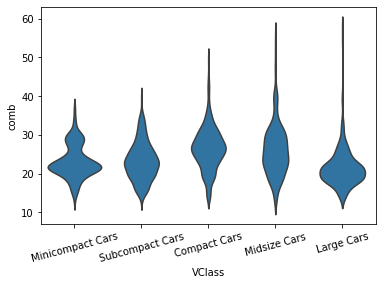

In [12]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

base_color = sb.color_palette()[0]
 
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None)
plt.xticks(rotation=15);

#### Box Plot: Quantitative  variable vs Qualtiative  variable
#### You should use box plots when :
- Getting high level intution of the data
- Doing Explonatry data analysis, so it's more simple than violin plot

[seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)

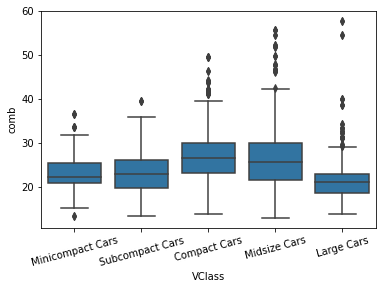

In [13]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

#### Clustered Bar Chart: Qualtiative  variable vs Qualtiative  variable


In [14]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

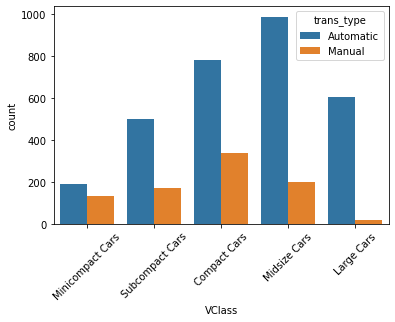

In [15]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 45)

## Multivariate plots : Deeper Insights
- Non-Positional Encodings for Third Variables
    - Three numeric variables
    - Two numeric variables and one categorical variable
    - One numeric variable and two categorical variables
    - Three categorical variables


- Faceting 

#### Scatter Plot with Shape encoding: Two numeric variables and one categorical variable (Nominal)


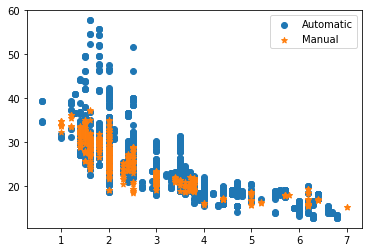

In [16]:
cat_markers = [['Automatic', 'o'],
               ['Manual', '*']]

for cat, marker in cat_markers:
    df_cat = fuel_econ[fuel_econ['trans_type'] == cat]
    plt.scatter(data = df_cat, x = 'displ', y = 'comb', marker = marker)
plt.legend(['Automatic','Manual'])

#### Scatter Plot with Color encoding: Two numeric variables and one categorical variable


- Categorical variable is ordinal

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


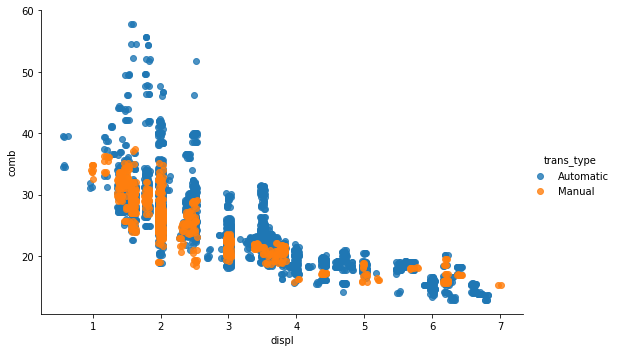

In [17]:
g = sb.FacetGrid(data = fuel_econ, hue = 'trans_type', hue_order=['Automatic', 'Manual'], size = 5, aspect = 1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False)
g.add_legend()

- Categorical variable is nominal

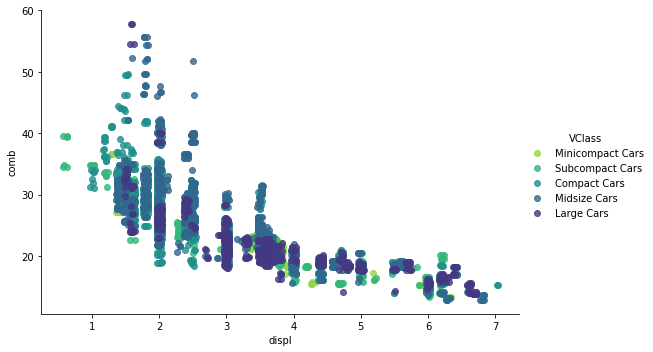

In [18]:
g = sb.FacetGrid(data = fuel_econ, hue = 'VClass', size = 5, aspect = 1.5, palette='viridis_r')
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False)
g.add_legend()

#### Scatter Plot with Size encoding: Three numeric variables


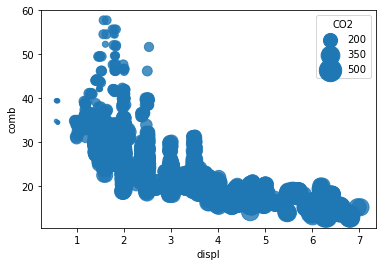

In [19]:
sb.regplot(data = fuel_econ, x='displ', y='comb', x_jitter=0.04, fit_reg=False, scatter_kws={'s':fuel_econ['co2']/2})
# dummy series for adding legend
sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title = 'CO2')

#### Faceting : Create multi plots instead of encoding in one plot
#### Here we plot 4 variables, 2 categorical and 2 numerical


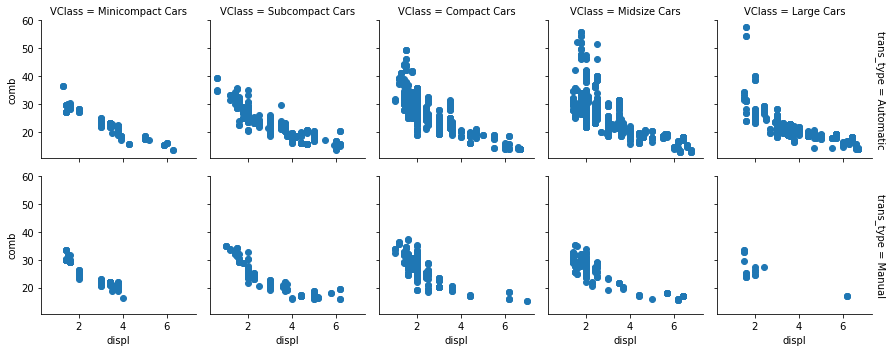

In [20]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'displ', 'comb')